# Lesson 2

## NumPy and Pandas

- Two Python packages
    - Some packages (like datetime) are built-in – NumPy and Pandas are not
- NumPy is Numerical Python – it makes lists much better
- Pandas is Python Data Analysis – it brings Excel-like tables to Python

### NumPy `array`s

- “Array” just means list in tech-speak. We distinguish these from ‘vanilla’ Python lists.
- NumPy arrays can have multiple dimensions and “shape” – like a matrix.
- They cannot be “jagged”



#### Why?

- Operations on `array`s are natively 'parallel' – done all at once, rather than step-by-step
    - We often call this a “vectorised” operation
- ‘Fancy’ indexing – we can construct any `list` of indices, or use a condition to generate a `True`/`False` 'mask' over the array, and get those indices from the `array`
    - Better than slices, which are restricted to equal-size steps!
- In order that these should work properly with their special properties, the entire `array` must be the same type (unlike a Python `list`, which can mix types) 

In [3]:
import numpy as np

# Initial savings balances
savings = np.array([5000., 12000., 8000., 15000.])

annual_interest = 0.05
tax_threshold = 10000
tax_rate = 0.2
years = 5
total_tax = np.zeros_like(savings) # Create an array of zeros with the same shape as the array of savings

for _ in range(years):
    savings *= (1 + annual_interest)  # Apply compound interest in parallel
    taxable_amount = savings - tax_threshold # Determine taxable amount in parallel...
    tax = taxable_amount * tax_rate
    tax[tax < 0] = 0
    savings -= tax
    total_tax += tax  # Accumulates tax

print("Final savings:\n", savings)
print("Total tax lost:\n", total_tax)


Final savings:
 [ 6381.4078125 12290.8940288 10168.202     13545.529856 ]
Total tax lost:
 [   0.        2743.2015872   42.0505    5033.992064 ]


In [4]:
age = 23

# If
if age > 18:
    print("You are an adult")
elif age == 18:
    print("You are (just barely) an adult")
else:
    print("You are not an adult")

You are an adult


In [5]:
total_tax

array([   0.       , 2743.2015872,   42.0505   , 5033.992064 ])

In [6]:
table = np.stack([savings, total_tax])
table

array([[ 6381.4078125, 12290.8940288, 10168.202    , 13545.529856 ],
       [    0.       ,  2743.2015872,    42.0505   ,  5033.992064 ]])

In [7]:
table.shape, table.ndim # shape, number of dimensions

((2, 4), 2)

In [8]:
table[1, 2] # we can index numpy arrays like this

42.05050000000047

In [9]:
table[:, 3]

array([13545.529856,  5033.992064])

#### Exercises

1. Explore the above script and make sure that it works. Copy it below and try changing (some, and then all) the savings to integers, or removing the line which bounds tax above 0. What happens? Why?
2. What is the statement `tax < 0` doing i.e. what is this statement equal to? Which of the advantages of NumPy does this relate to? Experiment with this type of statement, and with indexing NumPy `array`s with them, until you are happy that you understand what was done in the above example

In [10]:
# Put your answer here (Esc > 'b' to add more cells)

### Pandas tables (`DataFrame`s)

- A "`DataFrame`" is a table
- `DataFrame`s are made of columns
    - Each column is called a Series – you can also have these on their own
    - You can create a DataFrame from a dictionary of lists (but the lists must be equal length, so that the dictionary is ‘square’ like a table)

#### Why?

- A lot of data is stored in tables
- One special column is called the index – this locates each row of the table (and is not a pandas Series, unlike the other columns)
    - The index does not have to be 0, 1, 2… <br>
    e.g.: dates, human names, coordinates
- DataFrames and Series are packed with useful methods! E.g. `.describe()`, `.mean()`, `.nunique()`

In [11]:
import pandas as pd

# Creating the dictionary of lists
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "City": ["New York", "Los Angeles", "Chicago", "Houston"]
}

In [12]:
# Creating the actual dataframe
df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston


In [13]:
df["Age"] # This one column is a pd.Series

0    25
1    30
2    35
3    40
Name: Age, dtype: int64

In [14]:
df["Age"].mean() # We can get its mean

32.5

In [15]:
df["City"].nunique() # We can get the unique number of cities

4

In [16]:
df.describe() # Provides summary statistics for numerical columns 

,Age
count,4.000000
mean,32.500000
std,6.454972
min,25.000000
25%,28.750000
50%,32.500000
75%,36.250000
max,40.000000


In [17]:
df = df.set_index("Name") # We can set the index to be the name column,,,
df

,Age,City
Name,,
Alice,25,New York
Bob,30,Los Angeles
Charlie,35,Chicago
David,40,Houston


<Axes: xlabel='Name', ylabel='Age'>

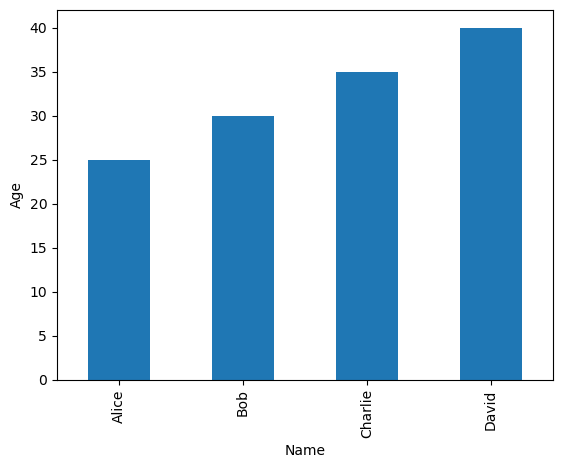

In [18]:
df['Age'].plot(kind="bar", ylabel="Age") # We can plot things super easily!

In [19]:
df.loc['Alice'] # .loc is how we get rows and/or columns from the dataframe

Age           25
City    New York
Name: Alice, dtype: object

In [20]:
df.loc['Alice', 'Age']

25

In [21]:
df.to_excel('example_data.xlsx') # write to Excel spreadsheet

In [22]:
df_loaded = pd.read_excel('example_data.xlsx') # read from Excel file 
df_loaded

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston


In [23]:
# notice that the index was not preserved when we loaded before - but we can set the index column when loading as follows
df_loaded = pd.read_excel('example_data.xlsx', index_col="Name") # read from Excel file 
df_loaded

,Age,City
Name,,
Alice,25,New York
Bob,30,Los Angeles
Charlie,35,Chicago
David,40,Houston


In [24]:
df.to_csv('example_data.csv') # write to CSV file

In [25]:
df_loaded = pd.read_csv('example_data.csv') # read from a CSV file - similarly, the index is not preserved
df_loaded

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston


In [26]:
df_loaded = pd.read_csv('example_data.csv', index_col="Name") # similarly, we can explicitly say which column we should load as the index
df_loaded

,Age,City
Name,,
Alice,25,New York
Bob,30,Los Angeles
Charlie,35,Chicago
David,40,Houston


#### Exercises

Using the above as hints:

1. Some data is defined in a dataframe below. Look up how to get this data as a NumPy `array`.
2. Once you have the data as a NumPy array, scale **each column** of values so that they are between 0 and 1. Try to do this without using the internet first, but look up how if you have too much difficulty! Assign the normalised values to a new variable.
3. Try also to normalise the values inside the `DataFrame`, without using NumPy. You could also use the NumPy `array` you made in the last exercise if you have any problems. Once the normalised values are in a `DataFrame`, plot a scatter graph of area against population. Plot the unnormalised values separately, and observe the difference.

In [27]:
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [28]:
# Put your answer here (Esc > 'b' to add more cells)